# Poker data analysis

## Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "poker_results_long.csv"

In [3]:
df = pd.read_csv(filename)
df.head()

,Date,Position,Player
0,2021-11-23,1,Jacques
1,2021-11-23,2,Nick
2,2021-11-23,3,Kevin
3,2021-11-23,4,Marlan
4,2021-11-23,5,David


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      420 non-null    datetime64[ns]
 1   Position  420 non-null    int64         
 2   Player    420 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.0+ KB


In [6]:
df.head()

,Date,Position,Player
0,2021-11-23,1,Jacques
1,2021-11-23,2,Nick
2,2021-11-23,3,Kevin
3,2021-11-23,4,Marlan
4,2021-11-23,5,David


In [7]:
sns.set_theme()
sns.set_style("white")

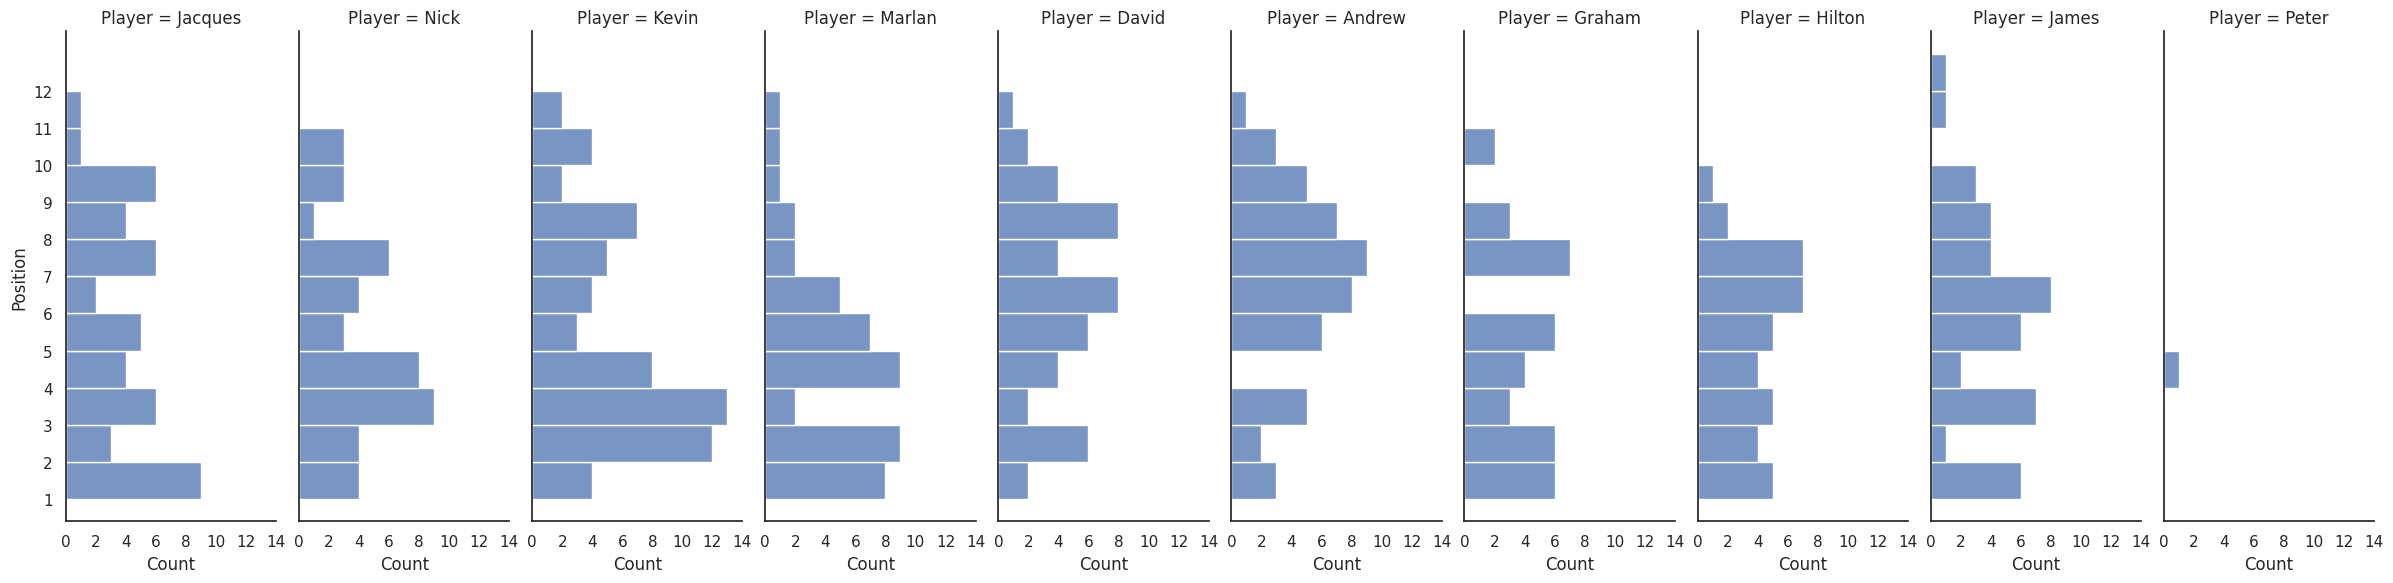

In [8]:
g = sns.displot(data=df, kind="hist", col="Player", y="Position", height=6, aspect=0.4, binwidth=1, binrange=[1, 13])
for ax in g.axes.ravel():
    ax.set_yticks(list(range(1, 13)))
    ax.set_xticks(list(range(0, 16, 2)))